In [46]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
import random
import matplotlib

In [79]:
def update_kmeans(points, centroids):
    classes = []
    for point in points:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        classes.append(distances.index(min(distances)))

    new_centroid_locs = [np.array((0.0, 0.0)) for _ in range(len(centroids))]
    num_points_at_centroid = [0 for _ in range(len(centroids))]

    for i in range(len(points)):
        new_centroid_locs[classes[i]] += points[i]
        num_points_at_centroid[classes[i]] += 1

    for i in range(len(centroids)):
        new_centroid_locs[i] /= num_points_at_centroid[i]

    return classes, new_centroid_locs

In [96]:
def make_animation(points,centroids,colors,predefined_colors,num_frames = 10, interval=100):
    fig, ax = plt.subplots()
    scatter = ax.scatter(*zip(*points), c=colors)

    def update(frame):
        nonlocal centroids
        def get_colors(classes):
            return [predefined_colors[classes[i]] for i in range(len(classes))]
        
        new_classes,new_centroid_locs =  update_kmeans(points,centroids)
        centroids = new_centroid_locs
        
        colors = get_colors(new_classes)
        scatter.set_color(colors)
        
        return scatter,

    animation = FuncAnimation(fig, update, frames=range(num_frames), interval=interval, blit=True)

    display(HTML(animation.to_html5_video()))

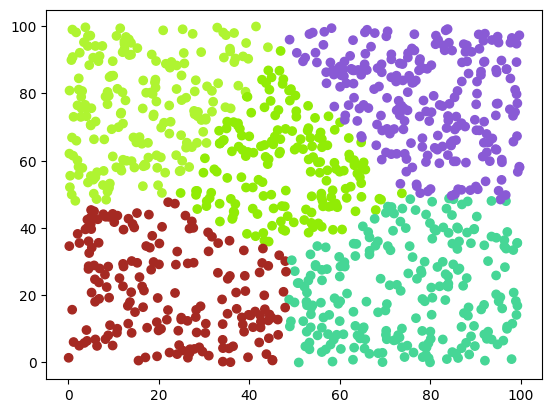

In [98]:
k = 5
n = 1000
r_bounds,l_bounds,u_bounds,d_bounds = 100,0,100,0
points = [np.array((float(np.random.uniform(l_bounds, r_bounds)), float(np.random.uniform(d_bounds, u_bounds)))) for _ in range(n)]
centroids = [points[np.random.randint(0, len(points))] for _ in range(k)]
colors = [matplotlib.colors.to_hex(np.random.rand(3)) for _ in range(n)]
predefined_colors = [matplotlib.colors.to_hex(np.random.rand(3)) for _ in range(k)]

make_animation(points=points,centroids=centroids,colors=colors,predefined_colors=predefined_colors,num_frames = 100, interval=100)